# Bloom Filter Benchmarking

In [33]:
import pandas as pd
import numpy as np
from plotnine import (ggplot, aes, geom_line, geom_point,
                      geom_text, labs, theme, element_text,
                      theme_bw, scale_color_manual)


In [24]:
df5 = pd.read_csv("dataframe_words_5.csv", index_col=0)
df10 = pd.read_csv("dataframe_words_10.csv", index_col=0)
df15 = pd.read_csv("dataframe_words_15.csv", index_col=0)
df20 = pd.read_csv("dataframe_words_20.csv", index_col=0)

df5.head()

,input_size,insertion_time,checking_time,fpr,cpr,uniform,independent
0,10000,0.023481,0.022223,2.759240e-07,69.314718,True,True
1,20000,0.046677,0.044220,7.804248e-06,34.657359,True,True
2,30000,0.069921,0.067522,5.243620e-05,23.104906,True,True
3,40000,0.093731,0.089016,1.957134e-04,17.328680,True,True
4,50000,0.116609,0.110641,5.295634e-04,13.862944,True,True


## How insertion time varies with increasing number of inputs

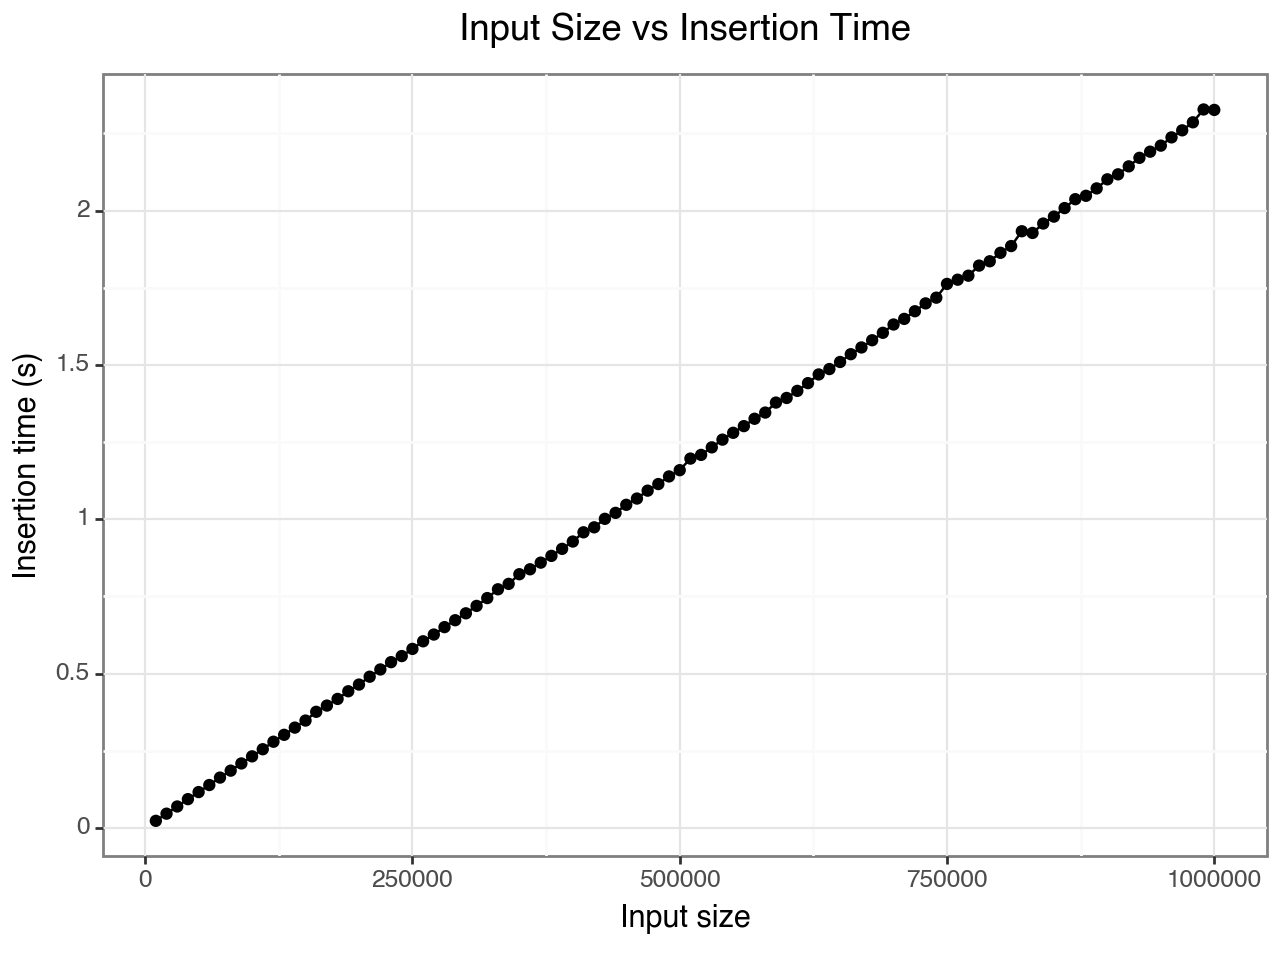

In [25]:

plot1 = ggplot(df5) + aes(x="input_size", y="insertion_time") + geom_line() + theme_bw() + geom_point()
plot1 = plot1 + labs(x="Input size", y="Insertion time (s)", title="Input Size vs Insertion Time") 
plot1 = plot1 + theme(plot_title=element_text(hjust=0.5))
print(plot1)

## How checking time varies with increasing number of items to check

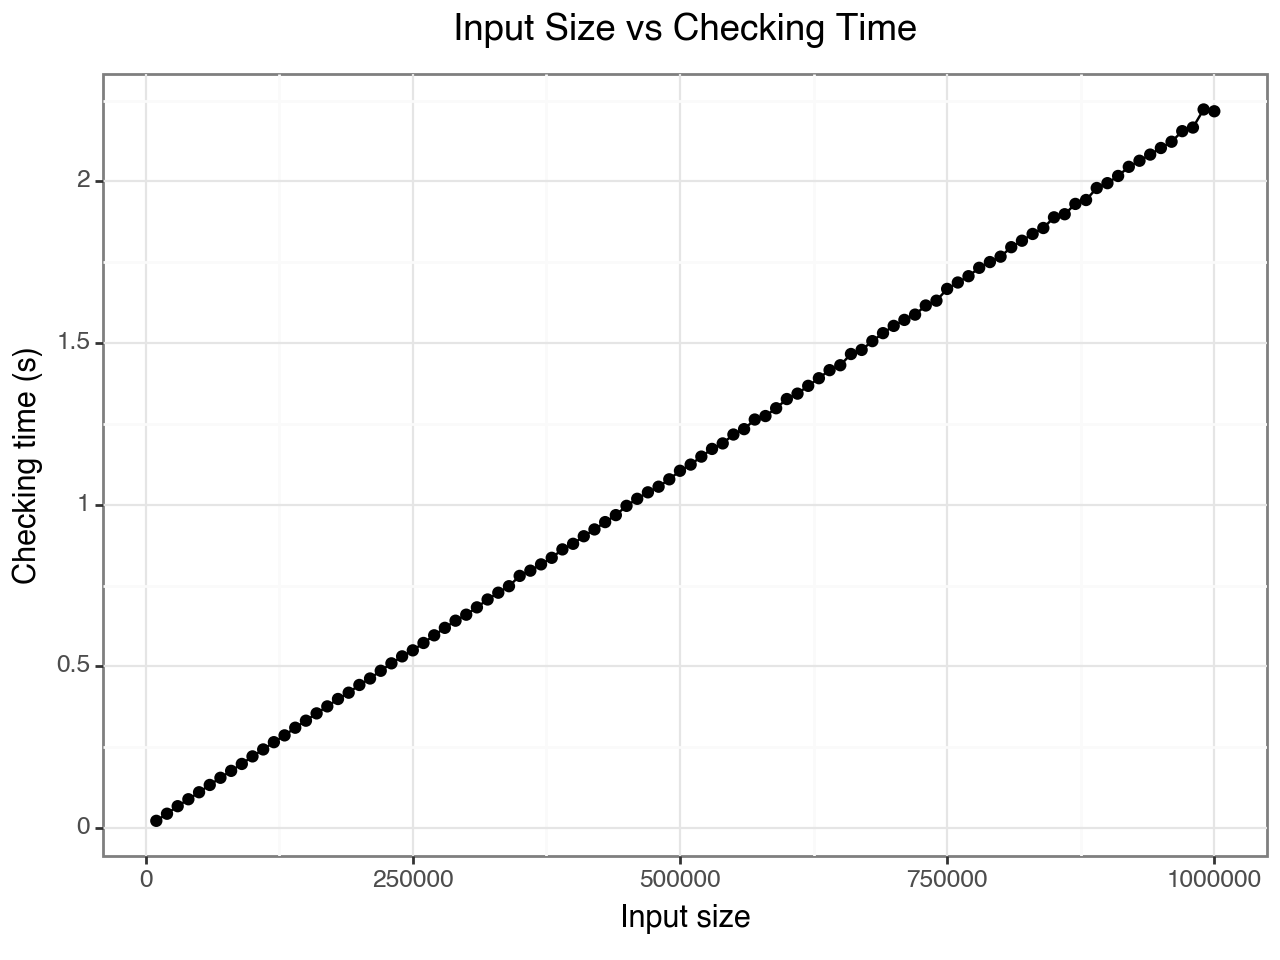

In [26]:
plot2 = ggplot(df5) + aes(x="input_size", y="checking_time") + geom_line() + theme_bw() + geom_point()
plot2 = plot2 + labs(x="Input size", y="Checking time (s)", title="Input Size vs Checking Time") 
plot2 = plot2 + theme(plot_title=element_text(hjust=0.5))
print(plot2)

## How number of False positives vary with increasing number of items

The false positive rate \( fpr \) is given by the formula:

$$
fpr = \left(1 - \left(1 - \frac{1}{m}\right)^{kn}\right)^k
$$

where 
- m is the bit array size
- k is the number of hash functions
- n is the number of inputs.

The formular above shows that the fpr does not have a linear relationship with the number of inputs, n. Given that we currently have the same k and m, the fpr value changes based on the number of inputs. he figure below shows at at the starting phase, that is when the number of inputs are still small, the fpr value is very small, very close to zero. This can be explained by the fact that with a small number of inputs at the start, all the bit of the array are set to 0, and the chance of a hash collision is minimal.

As the number of elements approaches the capacity of the Bloom filter, the false positive rate increases more exponentially. This is due to a higher number of bits being set to 1, increasing the chance that a random element will hash to a set of bits that are all 1s, the chance of collision increases as the number of inputs approach the cacpacity of the filter. This is illustrated in the figure below.


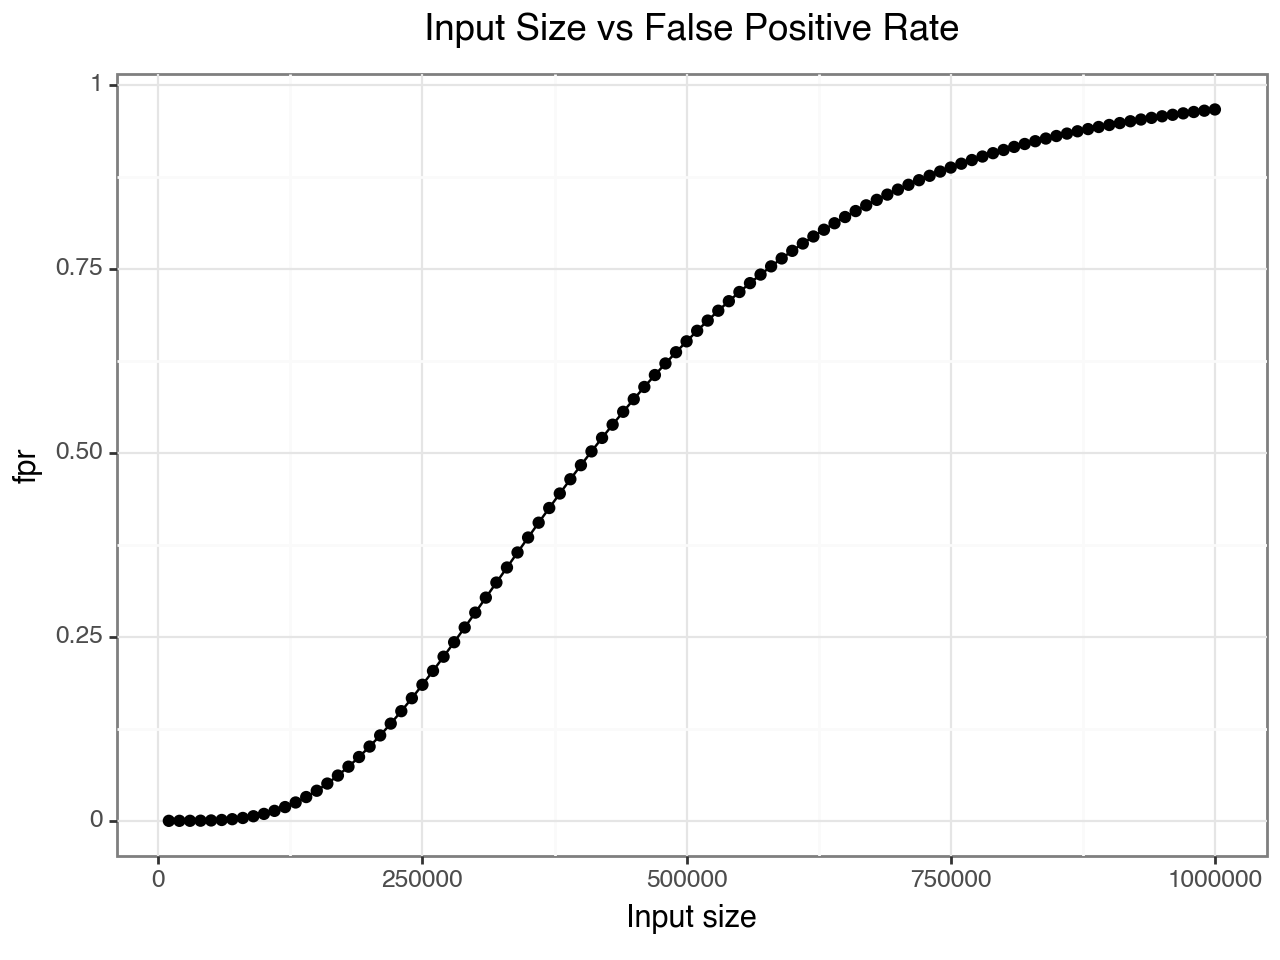

In [27]:
plot3 = ggplot(df5) + aes(x="input_size", y="fpr") + geom_line() + theme_bw() + geom_point()
plot3 = plot3 + labs(x="Input size", y="fpr", title="Input Size vs False Positive Rate") 
plot3 = plot3 + theme(plot_title=element_text(hjust=0.5))
print(plot3)

## How the compression vary with increasing number of items

The compression rate measures how many bits are used per element stored in the filter. While keeping the bit array size constant, the compression rate decreases with increasing number of inputs.

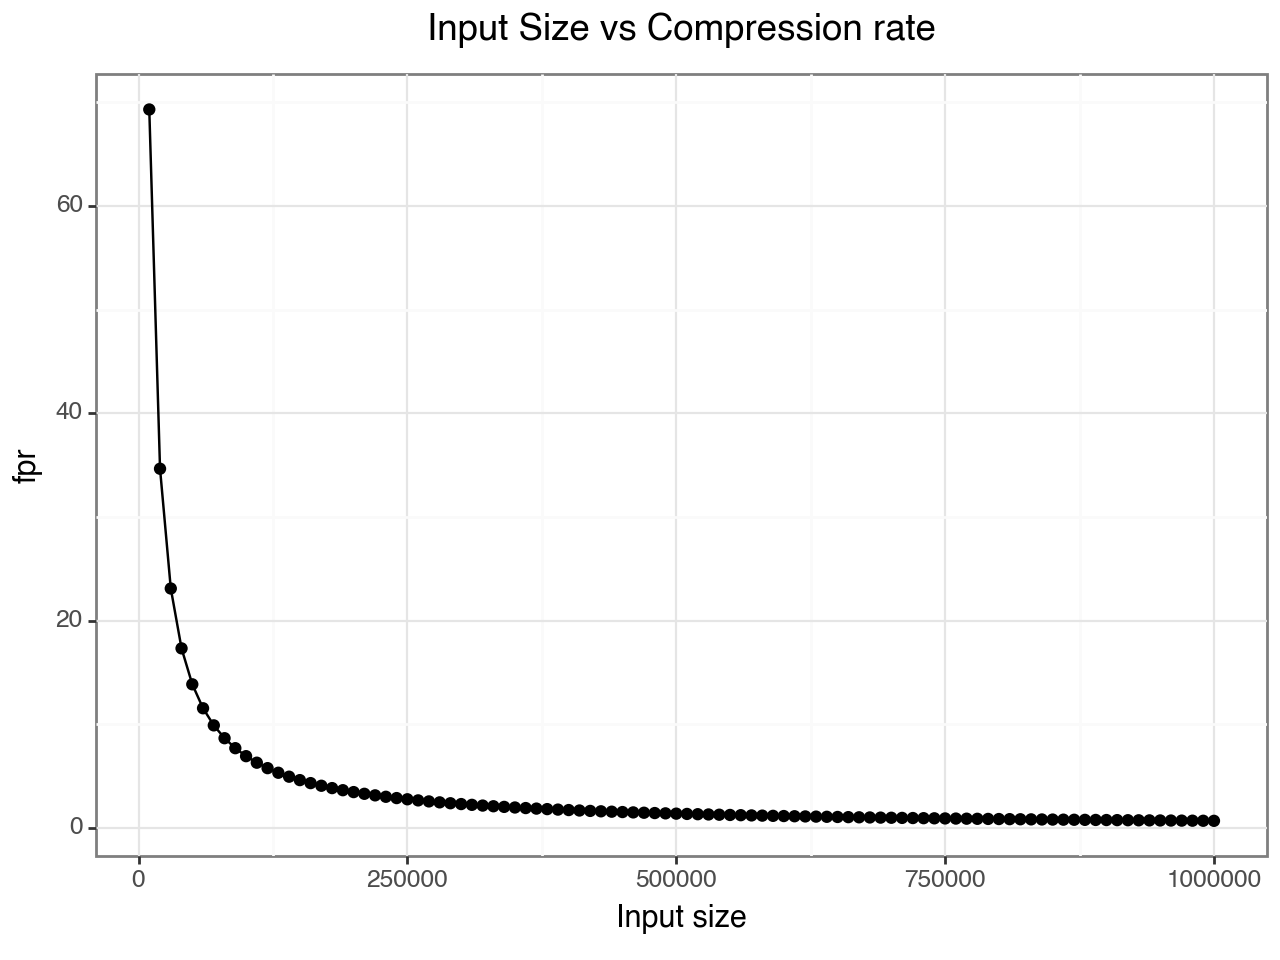

In [28]:
plot4 = ggplot(df5) + aes(x="input_size", y="cpr") + geom_line() + theme_bw() + geom_point()
plot4 = plot4 + labs(x="Input size", y="fpr", title="Input Size vs Compression rate") 
plot4 = plot4 + theme(plot_title=element_text(hjust=0.5))
print(plot4)

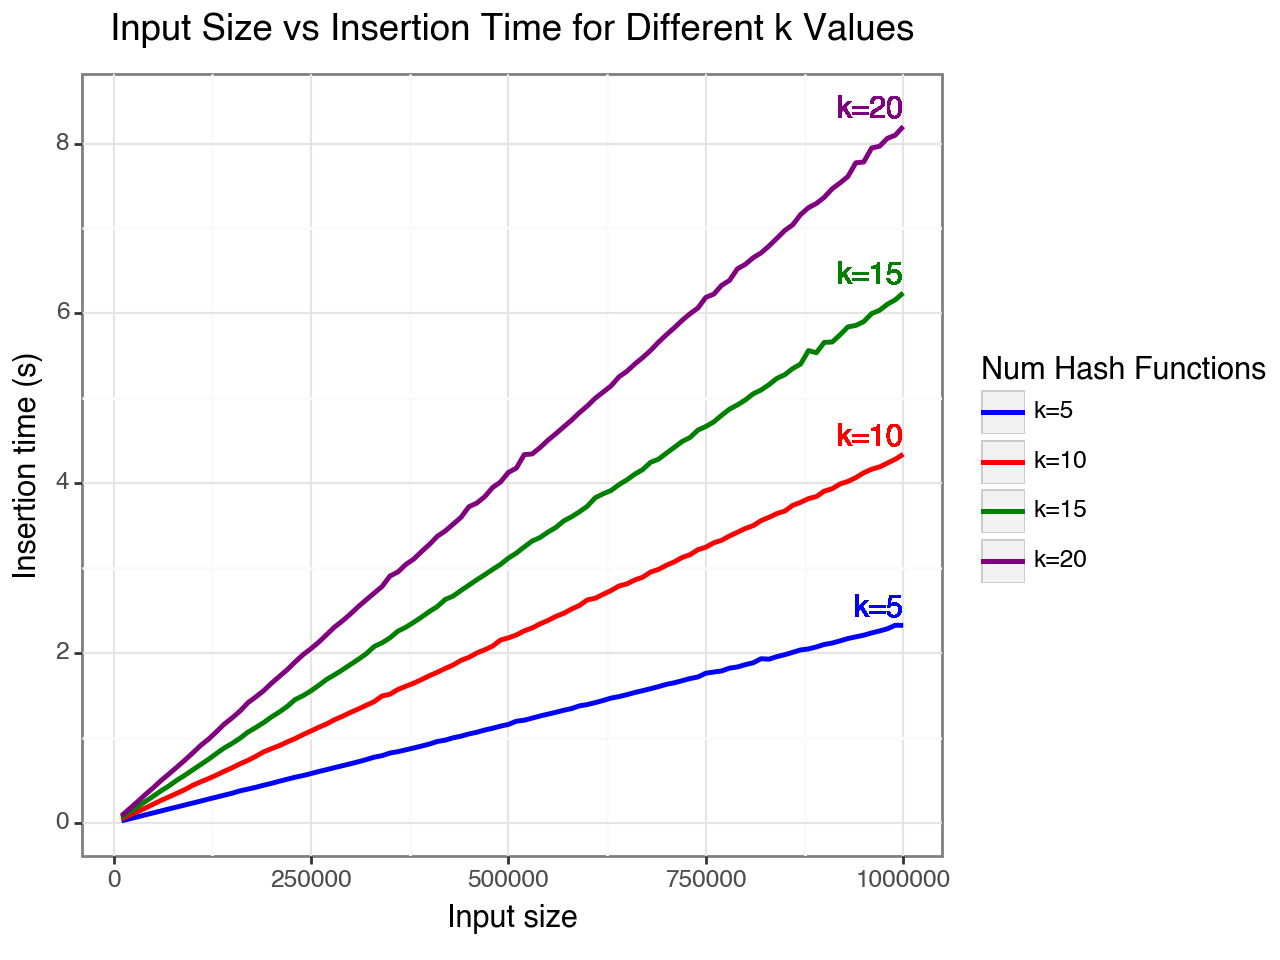

In [30]:
plot5 = (
    ggplot() +
    geom_line(data=df5, mapping=aes(x="input_size", y="insertion_time", color="'k=5'"), size=1) + 
    geom_line(data=df10, mapping=aes(x="input_size", y="insertion_time", color="'k=10'"), size=1) + 
    geom_line(data=df15, mapping=aes(x="input_size", y="insertion_time", color="'k=15'"), size=1) + 
    geom_line(data=df20, mapping=aes(x="input_size", y="insertion_time", color="'k=20'"), size=1) + 
    geom_text(data=df5, mapping=aes(x=max(df5['input_size']), y=max(df5['insertion_time']) + 0.2, label="'k=5'"), color="blue", ha='right') +
    geom_text(data=df10, mapping=aes(x=max(df10['input_size']), y=max(df10['insertion_time']) + 0.2, label="'k=10'"), color="red", ha='right') +
    geom_text(data=df15, mapping=aes(x=max(df15['input_size']), y=max(df15['insertion_time']) + 0.2, label="'k=15'"), color="green", ha='right') +
    geom_text(data=df20, mapping=aes(x=max(df20['input_size']), y=max(df20['insertion_time']) + 0.2, label="'k=20'"), color="purple", ha='right') +
    labs(x="Input size", y="Insertion time (s)", title="Input Size vs Insertion Time for Different k Values") +
    scale_color_manual(name="Num Hash Functions", values={"k=5":"blue", "k=10":"red", "k=15":"green", "k=20":"purple"}) +
    theme_bw() +
    theme(plot_title=element_text(hjust=0.5))
)

print(plot5)

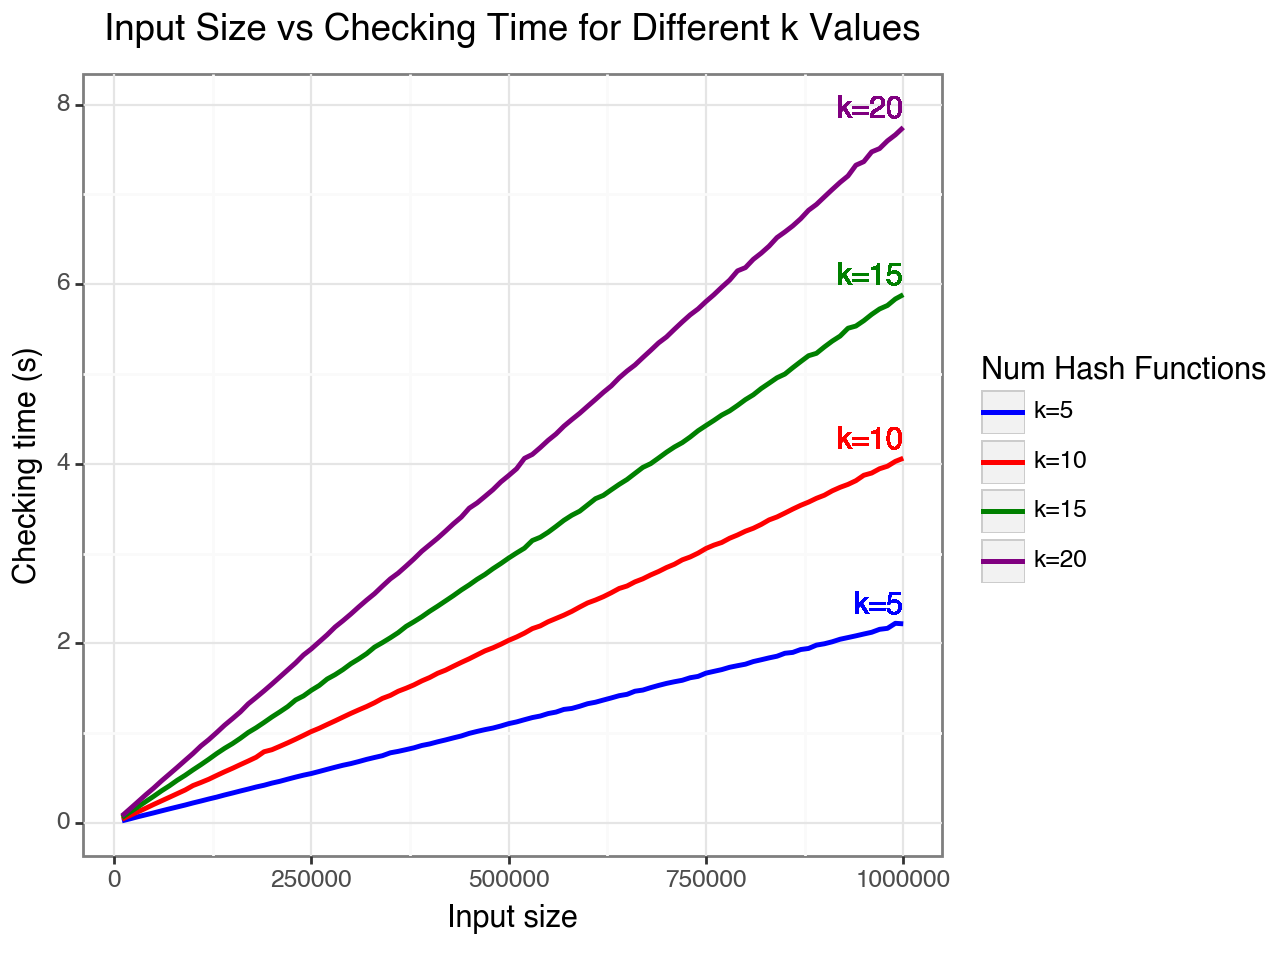

In [31]:

plot6 = (
    ggplot() +
    geom_line(data=df5, mapping=aes(x="input_size", y="checking_time", color="'k=5'"), size=1) + 
    geom_line(data=df10, mapping=aes(x="input_size", y="checking_time", color="'k=10'"), size=1) + 
    geom_line(data=df15, mapping=aes(x="input_size", y="checking_time", color="'k=15'"), size=1) + 
    geom_line(data=df20, mapping=aes(x="input_size", y="checking_time", color="'k=20'"), size=1) + 
    geom_text(data=df5, mapping=aes(x=max(df5['input_size']), y=max(df5['checking_time']) + 0.2, label="'k=5'"), color="blue", ha='right') +
    geom_text(data=df10, mapping=aes(x=max(df10['input_size']), y=max(df10['checking_time']) + 0.2, label="'k=10'"), color="red", ha='right') +
    geom_text(data=df15, mapping=aes(x=max(df15['input_size']), y=max(df15['checking_time']) + 0.2, label="'k=15'"), color="green", ha='right') +
    geom_text(data=df20, mapping=aes(x=max(df20['input_size']), y=max(df20['checking_time']) + 0.2, label="'k=20'"), color="purple", ha='right') +
    labs(x="Input size", y="Checking time (s)", title="Input Size vs Checking Time for Different k Values") +
    scale_color_manual(name="Num Hash Functions", values={"k=5":"blue", "k=10":"red", "k=15":"green", "k=20":"purple"}) +
    theme_bw() +
    theme(plot_title=element_text(hjust=0.5))
)

print(plot6)


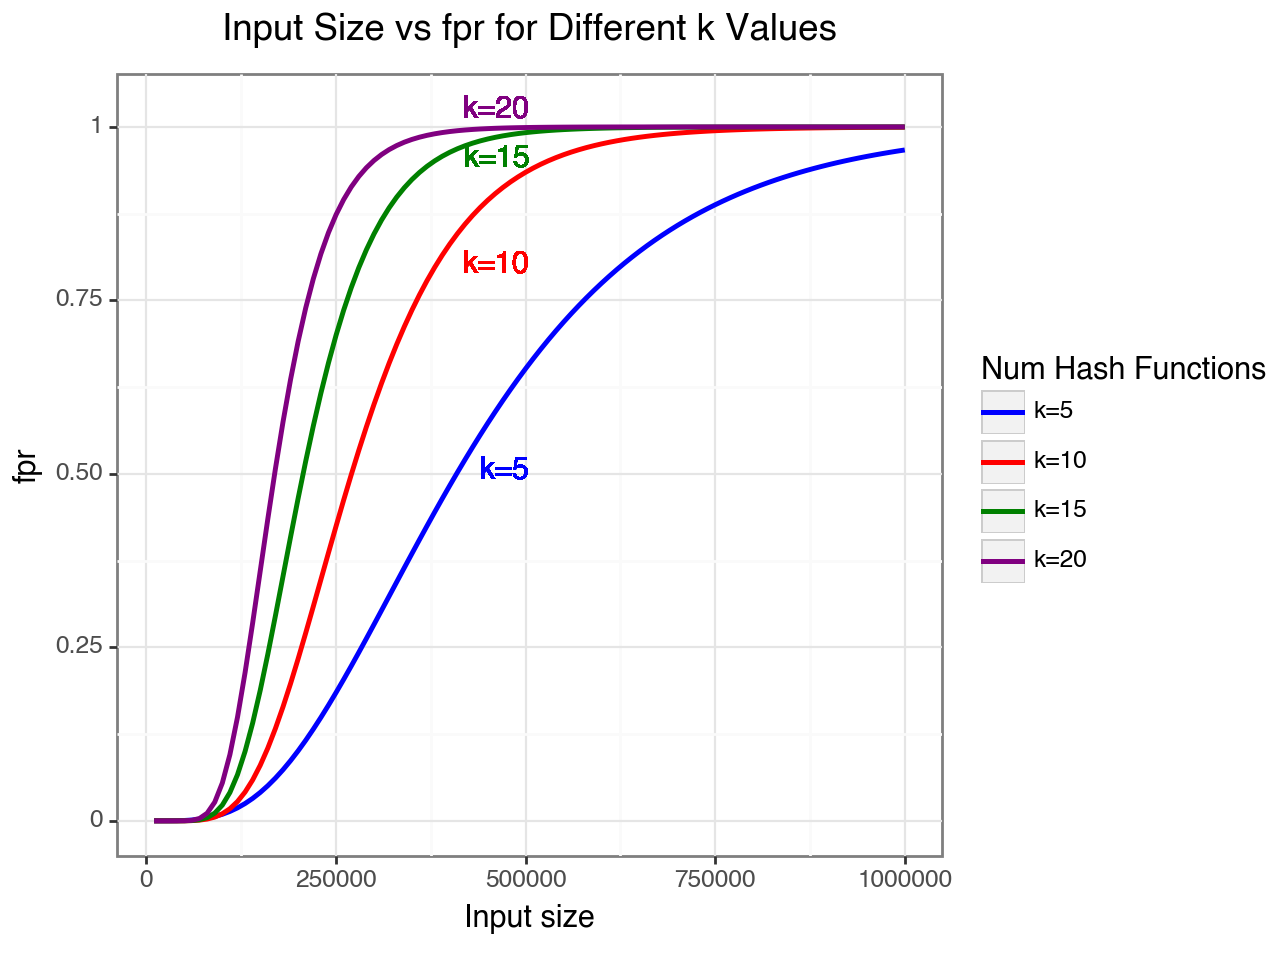

In [53]:
plot7 = (
    ggplot() +
    geom_line(data=df5, mapping=aes(x="input_size", y="fpr", color="'k=5'"), size=1) + 
    geom_line(data=df10, mapping=aes(x="input_size", y="fpr", color="'k=10'"), size=1) + 
    geom_line(data=df15, mapping=aes(x="input_size", y="fpr", color="'k=15'"), size=1) + 
    geom_line(data=df20, mapping=aes(x="input_size", y="fpr", color="'k=20'"), size=1) + 
    geom_text(data=df5, mapping=aes(x=np.mean(df5['input_size']), y=np.mean(df5['fpr']) - 0.05, label="'k=5'"), color="blue", ha='right') +
    geom_text(data=df10, mapping=aes(x=np.mean(df10['input_size']), y=np.mean(df10['fpr']) + 0.09, label="'k=10'"), color="red", ha='right') +
    geom_text(data=df15, mapping=aes(x=np.mean(df15['input_size']), y=np.mean(df15['fpr']) + 0.17, label="'k=15'"), color="green", ha='right') +
    geom_text(data=df20, mapping=aes(x=np.mean(df20['input_size']), y=np.mean(df20['fpr']) + 0.2, label="'k=20'"), color="purple", ha='right') +
    labs(x="Input size", y="fpr", title="Input Size vs fpr for Different k Values") +
    scale_color_manual(name="Num Hash Functions", values={"k=5":"blue", "k=10":"red", "k=15":"green", "k=20":"purple"}) +
    theme_bw() +
    theme(plot_title=element_text(hjust=0.5))
)

print(plot7)
